In [1]:
import h5py, sys, os
import numpy as np
from scipy.special import j0, j1
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from datetime import datetime
from pyhank import HankelTransform
print(os.getcwd())

%matplotlib widget

from jfunctions import *

# Get directory locations from param file
base_dir, run_dir, save_dir, version = read_params("./params.dat")

# Load simulation metadata
md = get_metadata()

# Load grids
gxf, gyf, gzf, dzf = get_grid(md)
gx, gy, gz, dz = get_grid(md, fractional_grid=False)

print(base_dir)

/mhome/damtp/q/cwp29/diablo3/proc/jupyter/waves
/store/ATMOS/cwp29/data/waves/N_05/512/


In [2]:
def amplitudes(var, rs, tstart, tend, z):
    tstart_idx = get_index(tstart, times)
    tend_idx = get_index(tend, times)
    
    waves = var[tstart_idx:1+tend_idx, get_index(z, gzf), :]
    
    H = HankelTransform(order=0, radial_grid = rs)

    wavesH = np.zeros_like(waves)

    for i in range(tend_idx-tstart_idx+1):
        wavesH[i] = H.qdht(waves[i])

    return np.fft.rfft(wavesH, axis=0)

Keys: <KeysViewHDF5 ['epsilon_xy', 'epsilon_xz', 'epsilon_yz', 'kappa_t1_xy', 'kappa_t1_xz', 'kappa_t1_yz', 'kappa_t2_xy', 'kappa_t2_xz', 'kappa_t2_yz', 'nu_t_xy', 'nu_t_xz', 'nu_t_yz', 'omegaX_xy', 'omegaX_xz', 'omegaX_yz', 'omegaY_xy', 'omegaY_xz', 'omegaY_yz', 'omegaZ_xy', 'omegaZ_xz', 'omegaZ_yz', 'th1_xy', 'th1_xz', 'th1_yz', 'th2_xy', 'th2_xz', 'th2_yz', 'u_xy', 'u_xz', 'u_yz', 'v_xy', 'v_xz', 'v_yz', 'w_xy', 'w_xz', 'w_yz']>
Az keys: <KeysViewHDF5 ['b_az', 'bb_sfluc', 'p_az', 'th_az', 'u_az', 'ub_sfluc', 'uth_sfluc', 'uu_sfluc', 'uv_sfluc', 'uw_sfluc', 'v_az', 'vv_sfluc', 'vw_sfluc', 'w_az', 'wb_sfluc', 'ww_sfluc']>


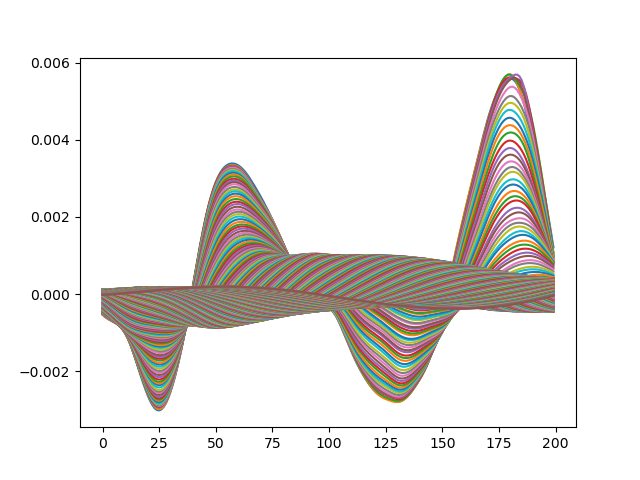

(230, 513, 256)
(230, 513, 256)
(200, 256)
Plume penetration occured at t=2.3056


In [3]:
#Load simulation data
_, times = load_data('th1_xz')
var1, var2 = load_az_data('w_az', 'b_az')
NSAMP = len(times)

var2 = np.gradient(var2, gzf, axis=1)
var2 = np.gradient(var2, times, axis=0)

tstart_idx = get_index(md['FINE_RES_TIME'], times)
tend_idx = get_index(md['TIME_LIMIT'], times)
zplot = 0.35

#waves = var2[tstart_idx:tend_idx+1, get_index(zplot, gzf), :]
waves = var1[tstart_idx:tend_idx+1, get_index(zplot, gzf), :]

plt.figure()
plt.plot(waves)
plt.show()

print(var1.shape)
print(var2.shape)
print(waves.shape)

times, t0_idx = calibrate_time(save_dir, times)

In [4]:
print(md)

{'LX': 0.6, 'LY': 0.6, 'LZ': 0.6, 'RE': 10000000000.0, 'nu': 1e-10, 'SAVE_MOVIE_DT': 0.25, 'SAVE_STATS_DT': 0.25, 'NU_START': 1e-09, 'SAVE_FLOW_DT': 30.0, 'VERSION': 3.9, 'NU_START_TIME': 10.0, 'SAVE_STATS_DT_FINE': 0.1, 'FINE_RES_TIME': 5.0, 'TIME_LIMIT': 25.0, 'r0': 0.005, 'alpha_e': 0.1, 'b0': 0.2, 'Lyc': 0.02, 'Lyp': 0.01, 'S_depth': 0.1, 'N2': 0.5, 'H': 0.2, 'b_factor': 0.4, 'Nb': 256.0, 'Nphi': 256.0, 'F_TYPE': 3.0, 'Nx': 512, 'Ny': 512, 'Nz': 513, 'Nth': 2}


In [5]:
dr = md['LX']/md['Nx']
nbins = int(md['Nx']/2)
r_bins = np.array([r*dr for r in range(0, nbins+1)])
r_points = np.array([0.5*(r_bins[i]+r_bins[i+1]) for i in range(nbins)])

print("Total time steps: %s"%NSAMP)
print("Dimensional times: ",times)


Total time steps: 230
Dimensional times:  [-2.30557471 -2.05557471 -1.80557471 -1.55557471 -1.30557471 -1.05557471
 -0.80557471 -0.55557471 -0.30557471 -0.05557471  0.          0.25
  0.5         0.75        1.          1.25        1.5         1.75
  2.          2.25        2.5         2.75        3.          3.25
  3.5         3.75        4.          4.25        4.5         4.75
  5.          5.1         5.2         5.3         5.4         5.5
  5.6         5.7         5.8         5.9         6.          6.1
  6.2         6.3         6.4         6.5         6.6         6.7
  6.8         6.9         7.          7.1         7.2         7.3
  7.4         7.5         7.6         7.7         7.8         7.9
  8.          8.1         8.2         8.3         8.4         8.5
  8.6         8.7         8.8         8.9         9.          9.1
  9.2         9.3         9.4         9.5         9.6         9.7
  9.8         9.9        10.         10.1        10.2        10.3
 10.4        10.5      

In [6]:
H = HankelTransform(order=0, radial_grid = r_points)

wavesH = np.zeros_like(waves)

for i in range(tend_idx-tstart_idx+1):
    wavesH[i] = H.qdht(waves[i])

amplitudes_nm = np.fft.rfft(wavesH, axis=0)

wavenumber_n = H.kr
omega_0 = 2*np.pi/(md['TIME_LIMIT']-md['FINE_RES_TIME'])
freq_m = np.fft.rfftfreq(tend_idx-tstart_idx+1)*2*np.pi/md['SAVE_STATS_DT_FINE']

print(omega_0)
print(amplitudes_nm.shape)

0.3141592653589793
(101, 256)


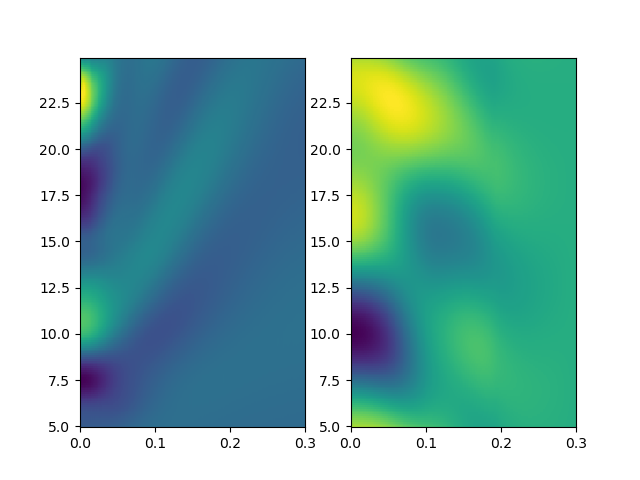

In [7]:
R = np.max(r_points) # m
N = np.sqrt(md['N2']) # s^-1

t_trunc = times[tstart_idx:]
t_trunc2 = np.append([times[tstart_idx]-md['SAVE_STATS_DT_FINE']/2], times[tstart_idx:] + md['SAVE_STATS_DT_FINE']/2)

X, Y = np.meshgrid(r_bins, t_trunc2)
Xf, Yf = np.meshgrid(r_points, t_trunc)

t_plot = 10

field_approx = np.zeros_like(Xf)

for i in range(len(freq_m)):
    for j in range(len(wavenumber_n)):
        if 0 < freq_m[i] <= N:
            k_z = -np.sqrt(np.power(wavenumber_n[j],2)*(N*N/(freq_m[i]*freq_m[i])-1))
            field_approx += np.real(amplitudes_nm[i,j]*j0(wavenumber_n[j]*Xf)*np.exp(1j*(k_z*zplot-freq_m[i]*Yf)))

fig, ax = plt.subplots(1,2)
ax[0].pcolormesh(X, Y, waves)
ax[1].pcolormesh(X, Y, field_approx)
plt.show()